# Setting 01

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv("Uniqlo_Training.csv")
df = pd.read_csv("crypto_master_1day.csv", delimiter = '\t')
df.head()

,Unnamed: 0,Open_LTC,High_LTC,Low_LTC,Close_LTC,Volume_LTC,Timestamp
0,2171,4.3636,4.57,4.09999,4.4997,15309.569057,2017-01-01
1,2172,4.5000,4.90,4.39161,4.5800,49640.520029,2017-01-02
2,2173,4.5600,4.75,4.40000,4.5400,21866.604246,2017-01-03
3,2174,4.5995,5.99,4.41100,4.6200,55530.049065,2017-01-04
4,2175,4.6596,4.88,3.88000,4.2153,112285.033200,2017-01-05


In [6]:
df.isnull().sum()

Unnamed: 0    0
Open_LTC      0
High_LTC      0
Low_LTC       0
Close_LTC     0
Volume_LTC    0
Timestamp     0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2369 non-null   int64  
 1   Open_LTC    2369 non-null   float64
 2   High_LTC    2369 non-null   float64
 3   Low_LTC     2369 non-null   float64
 4   Close_LTC   2369 non-null   float64
 5   Volume_LTC  2369 non-null   float64
 6   Timestamp   2369 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 129.7+ KB


In [4]:
df.describe()

,Unnamed: 0,Open_LTC,High_LTC,Low_LTC,Close_LTC,Volume_LTC
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2.369000e+03
mean,1184.000000,90.894840,95.336607,86.066120,90.947577,7.861040e+05
std,684.015716,61.797065,65.947556,57.398916,61.867706,7.314074e+05
min,0.000000,3.690000,3.850000,3.500000,3.690000,3.767725e+03
25%,592.000000,49.810000,51.849000,47.500000,49.777000,3.177793e+05
50%,1184.000000,70.798700,73.938000,67.569990,70.913400,5.435411e+05
75%,1776.000000,121.565000,126.470000,116.120000,121.725000,1.011290e+06
max,2368.000000,387.716300,420.000000,344.900000,388.300000,7.295433e+06


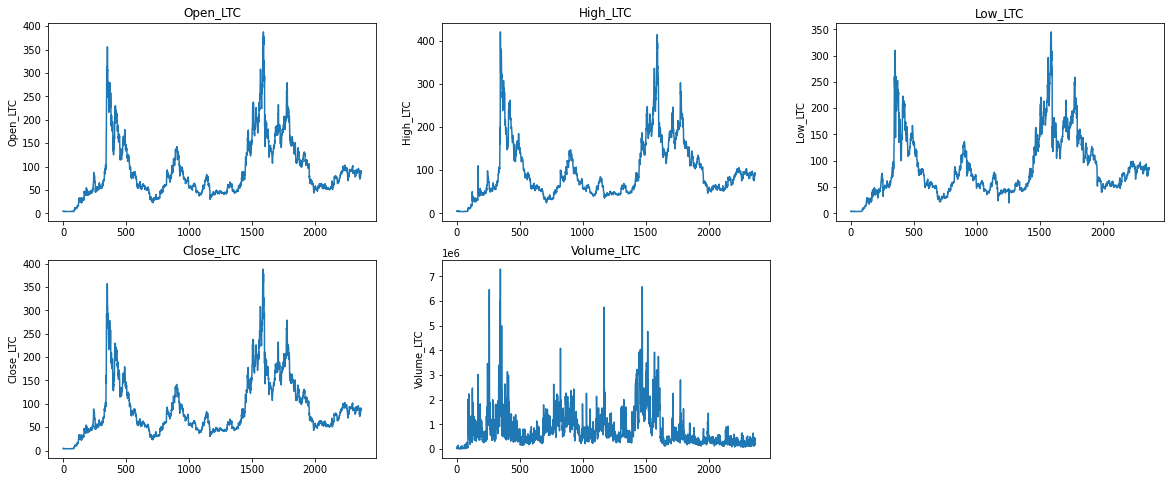

In [5]:
df.columns
col_names = ['Open_LTC', 'High_LTC', 'Low_LTC', 'Close_LTC', 'Volume_LTC']
plt.figure(figsize=(20,8))
for i, name in enumerate(col_names):
    plt.subplot(2, 3, i+1)
    plt.plot(df[name])
    plt.title(name)
    plt.ylabel(name)

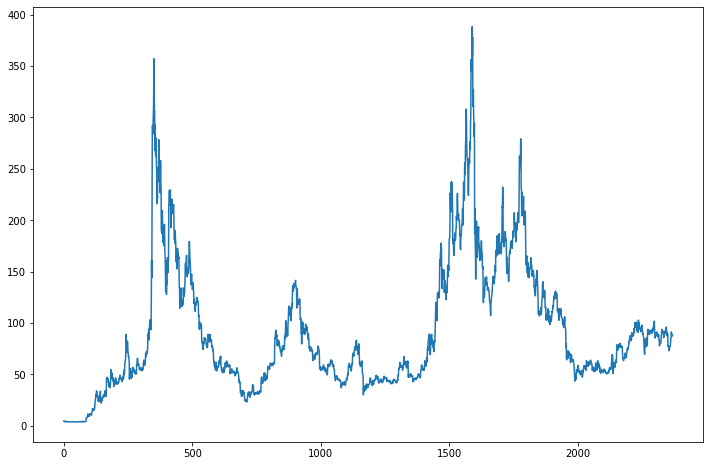

In [6]:
plt.figure(figsize=(12,8))
plt.plot(df['Close_LTC'])

In [7]:
d = df.sort_values(by = 'Timestamp')
d

,Unnamed: 0,Open_LTC,High_LTC,Low_LTC,Close_LTC,Volume_LTC,Timestamp
0,2171,4.3636,4.570,4.09999,4.4997,15309.569057,2017-01-01
1,2172,4.5000,4.900,4.39161,4.5800,49640.520029,2017-01-02
2,2173,4.5600,4.750,4.40000,4.5400,21866.604246,2017-01-03
3,2174,4.5995,5.990,4.41100,4.6200,55530.049065,2017-01-04
4,2175,4.6596,4.880,3.88000,4.2153,112285.033200,2017-01-05
...,...,...,...,...,...,...,...
2364,1943,86.0800,93.119,85.02000,91.3200,413309.700348,2023-06-23
2365,1944,91.3000,93.884,83.32000,89.7900,272097.256329,2023-06-24
2366,1945,89.7900,90.515,86.58000,88.2500,166115.687249,2023-06-25
2367,1946,88.2700,90.370,85.58000,87.2200,253217.527003,2023-06-26


# Predicting Closing Price

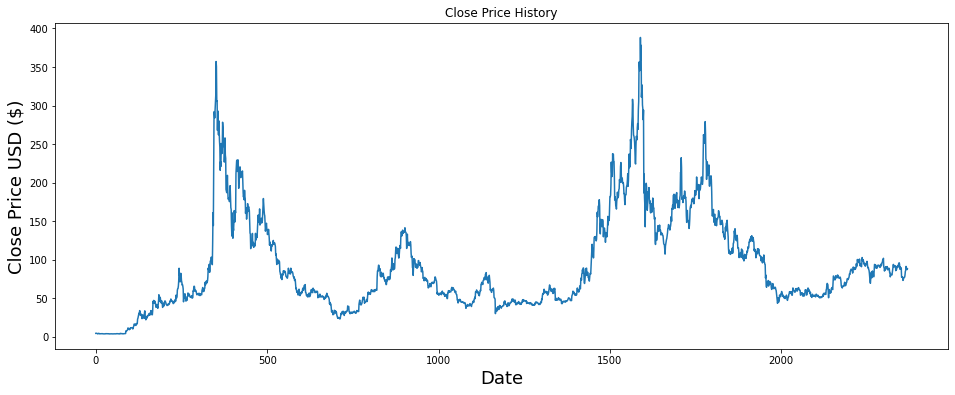

In [8]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(d['Close_LTC'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# Create a new dataframe with only the 'Close column 
data = d.filter(['Close_LTC'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2251

In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00210525],
       [0.00231403],
       [0.00221003],
       ...,
       [0.21985908],
       [0.21718104],
       [0.21944307]])

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00210525, 0.00231403, 0.00221003, 0.00241803, 0.0013658 ,
       0.00039001, 0.00078001, 0.00085801, 0.00171628, 0.00229817,
       0.00066093, 0.00080627, 0.00061413, 0.00066717, 0.00058111,
       0.00052703, 0.00067601, 0.00053275, 0.00055901, 0.00106861,
       0.00060009, 0.00046801, 0.00036401, 0.0001118 , 0.        ,
       0.00038169, 0.00043722, 0.00043109, 0.00049401, 0.00099191,
       0.00096201, 0.00101401, 0.00102701, 0.00084267, 0.00083539,
       0.00075401, 0.00070201, 0.00075401, 0.00072801, 0.0001222 ,
       0.00036297, 0.00039001, 0.000286  , 0.00026   , 0.00039905,
       0.00055688, 0.00044201, 0.00057201, 0.00032214, 0.00021518,
       0.000312  , 0.00043317, 0.00052001, 0.00056083, 0.00067598,
       0.00054601, 0.00048023, 0.00046801, 0.000208  , 0.00044201])]
[0.000910012740178363]

[array([0.00210525, 0.00231403, 0.00221003, 0.00241803, 0.0013658 ,
       0.00039001, 0.00078001, 0.00085801, 0.00171628, 0.00229817,
       0.00066093, 0.00080627, 0.0

(2191, 60, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=25)

Epoch 1/25
69/69 [==============================] - 13s 103ms/step - loss: 0.0051
Epoch 2/25
69/69 [==============================] - 7s 99ms/step - loss: 0.0016
Epoch 3/25
69/69 [==============================] - 7s 100ms/step - loss: 0.0012
Epoch 4/25
69/69 [==============================] - 5s 77ms/step - loss: 0.0010
Epoch 5/25
69/69 [==============================] - 7s 95ms/step - loss: 7.5800e-04
Epoch 6/25
69/69 [==============================] - 5s 73ms/step - loss: 8.2254e-04
Epoch 7/25
69/69 [==============================] - 6s 89ms/step - loss: 7.2662e-04
Epoch 8/25
69/69 [==============================] - 6s 80ms/step - loss: 6.9237e-04
Epoch 9/25
69/69 [==============================] - 6s 92ms/step - loss: 6.4749e-04
Epoch 10/25
69/69 [==============================] - 6s 93ms/step - loss: 5.9828e-04
Epoch 11/25
69/69 [==============================] - 6s 92ms/step - loss: 6.2730e-04
Epoch 12/25
69/69 [==============================] - 7s 94ms/step - loss: 5.8235e-04
Ep

In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.6366568371863868

C:\Users\16823\AppData\Local\Temp/ipykernel_12756/2531719358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


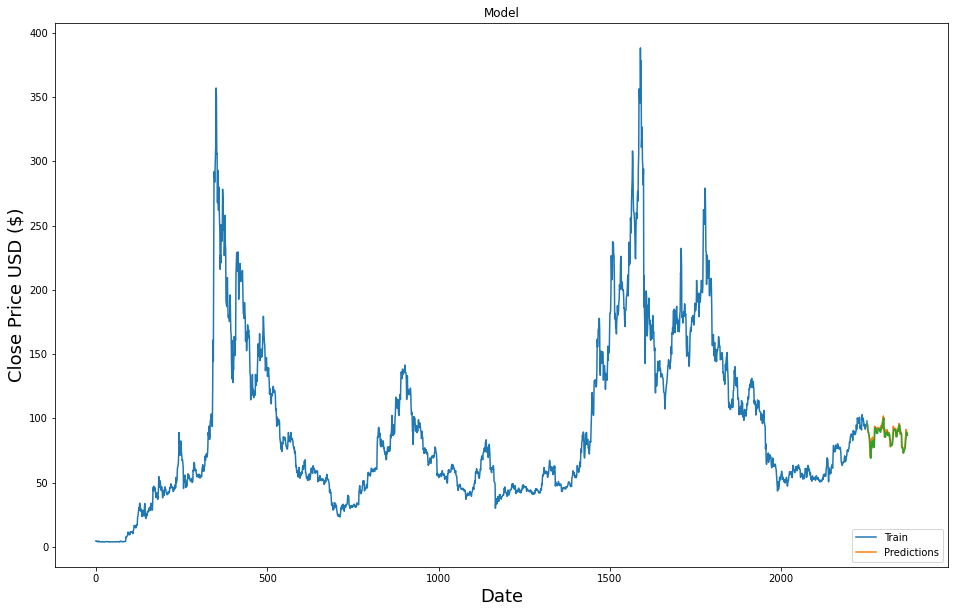

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close_LTC'])
plt.plot(valid[['Close_LTC', 'Predictions']])
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,Close_LTC,Predictions
2251,95.34,95.666046
2252,90.55,95.013519
2253,89.36,91.280319
2254,89.94,88.991547
2255,87.43,88.675209
...,...,...
2364,91.32,84.575249
2365,89.79,88.822449
2366,88.25,89.340477
2367,87.22,88.172646


In [21]:
c = 0
for i in range (118):
    if (abs(valid.iloc[i, 0] - valid.iloc[i, 1]))/valid.iloc[i, 0] <= .05:
        c = c + 1
print(" Accuracy is:", (c/118)*100)

 Accuracy is: 77.96610169491525


# Setting 02

# Data Preprocessing

In [28]:
df1 = pd.read_csv("crypto_master_1day.csv", delimiter = '\t')
dataframe = df1[['Close_LTC']]
dataframe.shape

(2369, 1)

In [29]:
def split_sequence(sequence, n_steps=3):
    sequence = list(sequence)
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    def reshape(d):
        d = np.array(d)
        d = np.reshape(d,(d.shape[0],d.shape[1],1))
        return d
    return reshape(X), np.array(y)

In [30]:
train_data = dataframe.Close_LTC.iloc[:2250]
test_data = dataframe.Close_LTC.iloc[2250:]

In [31]:
x_train,y_train = split_sequence(train_data)
x_test,y_test = split_sequence(test_data)

In [32]:
x_train.shape

(2247, 3, 1)

# RNN Model

In [33]:
from tensorflow import keras
import tensorflow
import datetime
import os

model = keras.Sequential([
    keras.layers.LSTM(64,input_shape=(3,1,),activation='relu',return_sequences=True),
    keras.layers.LSTM(64,activation='relu'),
    keras.layers.Dense(1)
])

In [34]:
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 3, 64)             16896     
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Callback & EarlyStopping

In [36]:
%load_ext tensorboard

In [37]:
os.makedirs('logs',exist_ok=True)
logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [38]:
callback = keras.callbacks.TensorBoard(logdir)
earlyStoping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

# Training Model

In [39]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32,callbacks=[callback,earlyStoping],verbose=2)

Epoch 1/100
71/71 - 4s - loss: 2186.9124 - 4s/epoch - 54ms/step
Epoch 2/100
71/71 - 0s - loss: 114.8931 - 419ms/epoch - 6ms/step
Epoch 3/100
71/71 - 0s - loss: 113.4868 - 425ms/epoch - 6ms/step
Epoch 4/100
71/71 - 0s - loss: 108.4834 - 425ms/epoch - 6ms/step
Epoch 5/100
71/71 - 0s - loss: 105.7236 - 434ms/epoch - 6ms/step
Epoch 6/100
71/71 - 0s - loss: 105.6415 - 430ms/epoch - 6ms/step
Epoch 7/100
71/71 - 0s - loss: 90.3849 - 429ms/epoch - 6ms/step
Epoch 8/100
71/71 - 0s - loss: 82.0641 - 431ms/epoch - 6ms/step
Epoch 9/100
71/71 - 0s - loss: 82.3609 - 447ms/epoch - 6ms/step
Epoch 10/100
71/71 - 0s - loss: 64.9352 - 445ms/epoch - 6ms/step
Epoch 11/100
71/71 - 0s - loss: 77.4892 - 476ms/epoch - 7ms/step
Epoch 12/100
71/71 - 0s - loss: 71.5424 - 426ms/epoch - 6ms/step
Epoch 13/100
71/71 - 0s - loss: 66.7618 - 439ms/epoch - 6ms/step


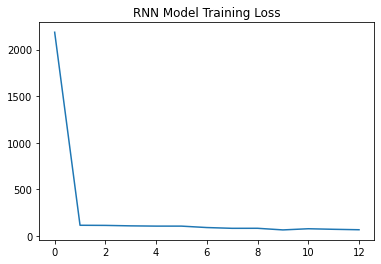

In [40]:
plt.plot(history.history['loss'])
plt.title('RNN Model Training Loss')
plt.savefig('RNNModel-TrainingLoss.png')

# Demonstrate Prediction

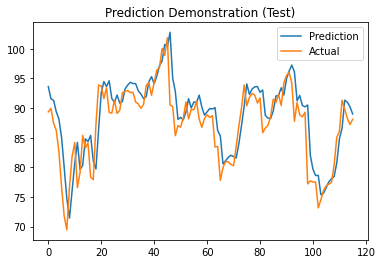

In [41]:
pred = model.predict(x_test)
plt.plot(pred,label='Prediction')
plt.plot(y_test,label='Actual')
plt.legend()
plt.title('Prediction Demonstration (Test)')
plt.savefig('PredictionDemonstration-Test.png')

In [42]:
predict = list(zip(*pred))[0]

In [43]:
preds_df = pd.DataFrame(list(zip(y_test, predict)), columns = ["Actual", "Predicted"])
preds_df

,Actual,Predicted
0,89.36,93.623680
1,89.94,91.566078
2,87.43,91.310402
3,86.26,89.410667
4,82.72,88.175499
...,...,...
111,91.32,86.579735
112,89.79,91.333626
113,88.25,90.988670
114,87.22,90.204224


In [44]:
c = 0
for i in range (116):
    if (abs(preds_df.iloc[i, 0] - preds_df.iloc[i, 1]))/preds_df.iloc[i, 0] <= .05:
        c = c + 1
print(" Accuracy is:", (c/preds_df.shape[0])*100)

 Accuracy is: 79.3103448275862


# Future Prediction

In [45]:
def predict_future(shift_count):
    def reshape(three):
        return np.array(three).reshape(1,3,1) 
    array =  list(dataframe.Close_LTC) + []
    now = len(dataframe)-3
    last = len(dataframe)
    for _ in range(shift_count):
        converted = reshape(array[now:last])
        array.append(model.predict(converted)[0][0])
        now += 1
        last += 1
    return array

In [46]:
future_prediction = predict_future(200)

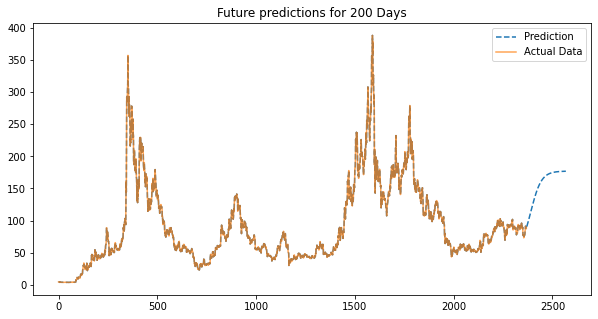

In [48]:
plt.figure(figsize=(10,5))
plt.plot(future_prediction,'--',label='Prediction')
plt.plot(dataframe.Close_LTC,label='Actual Data',alpha=0.7)
plt.title('Future predictions for 200 Days')
plt.legend();
#plt.savefig('Prediction-Now-1000daysFuture.png')

# Setting 03

In [7]:
#Importing the Libraries
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras. models import Sequential
from keras.layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
#from keras. Optimisers import Adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model


In [8]:
dataS = df
dataS.head()

,Unnamed: 0,Open_LTC,High_LTC,Low_LTC,Close_LTC,Volume_LTC,Timestamp
0,2171,4.3636,4.57,4.09999,4.4997,15309.569057,2017-01-01
1,2172,4.5000,4.90,4.39161,4.5800,49640.520029,2017-01-02
2,2173,4.5600,4.75,4.40000,4.5400,21866.604246,2017-01-03
3,2174,4.5995,5.99,4.41100,4.6200,55530.049065,2017-01-04
4,2175,4.6596,4.88,3.88000,4.2153,112285.033200,2017-01-05


<AxesSubplot:>

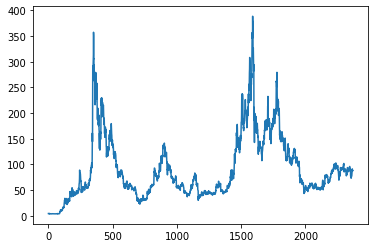

In [9]:
#Plot the True  Close Value
dataS['Close_LTC'].plot()

In [10]:
#Set Target Variable
output_var = PD.DataFrame(dataS['Close_LTC'])
#Selecting the Features
features = ['Open_LTC', 'High_LTC', 'Low_LTC', 'Volume_LTC']

In [11]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(dataS[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open_LTC,High_LTC,Low_LTC,Volume_LTC
0,0.001754,0.001730,0.001757,0.001583
1,0.002109,0.002523,0.002612,0.006291
2,0.002265,0.002163,0.002636,0.002482
3,0.002368,0.005142,0.002668,0.007099
4,0.002525,0.002475,0.001113,0.014882


In [12]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [13]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [14]:
X_train.shape

(2154, 1, 4)

In [15]:
trainX.shape[1]

4

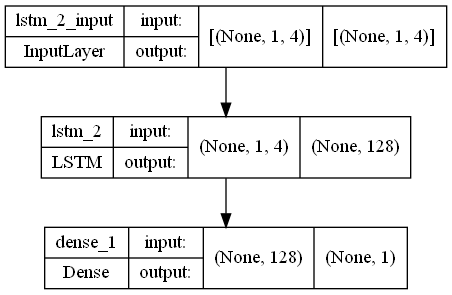

In [16]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(128, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [17]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=25, batch_size=8, verbose=1, shuffle=False)

Epoch 1/25
270/270 [==============================] - 3s 3ms/step - loss: 12113.1045
Epoch 2/25
270/270 [==============================] - 1s 3ms/step - loss: 9576.5938
Epoch 3/25
270/270 [==============================] - 1s 4ms/step - loss: 5100.4692
Epoch 4/25
270/270 [==============================] - 1s 5ms/step - loss: 1957.5724
Epoch 5/25
270/270 [==============================] - 1s 5ms/step - loss: 990.7852
Epoch 6/25
270/270 [==============================] - 1s 5ms/step - loss: 783.2497
Epoch 7/25
270/270 [==============================] - 1s 4ms/step - loss: 668.8452
Epoch 8/25
270/270 [==============================] - 1s 4ms/step - loss: 561.6059
Epoch 9/25
270/270 [==============================] - 1s 4ms/step - loss: 462.5779
Epoch 10/25
270/270 [==============================] - 1s 4ms/step - loss: 374.6523
Epoch 11/25
270/270 [==============================] - 1s 4ms/step - loss: 299.0782
Epoch 12/25
270/270 [==============================] - 1s 4ms/step - loss: 236.1

In [18]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

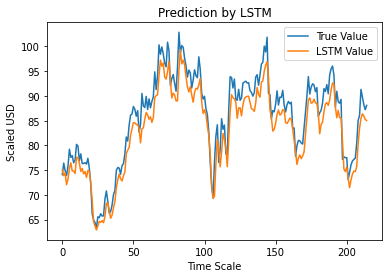

In [19]:
#Predicted vs True  Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [20]:
prediction = list(zip(*y_pred))[0]
pred_df = pd.DataFrame(list(zip(y_test, prediction)), columns = ["Actual", "Predicted"])
pred_df

,Actual,Predicted
0,74.095,75.087875
1,76.430,73.878372
2,74.880,74.448746
3,73.910,72.056671
4,75.770,73.200302
...,...,...
210,91.320,85.432030
211,89.790,86.376617
212,88.250,85.959557
213,87.220,85.237450


In [21]:
c = 0
for i in range (215):
    if abs(pred_df.iloc[i, 0] - pred_df.iloc[i, 1])/pred_df.iloc[i, 0] <= .05:
        c = c + 1
print(" Accuracy is:", (c/215)*100)

 Accuracy is: 86.9767441860465
